# **KNN Breast Cancer Wisconsin**

#### **Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import random

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import datasets

#### **Importando o dataset**

In [39]:
filename = 'wdbc.data'
df = pd.read_csv(filename, index_col=False, header=None)
#df.index() = ['ID Number', 'Tipo']
other_names = list(np.arange(0,30))
other_names.insert(0, 'Diagnosis')
other_names.insert(0, 'ID_Number')
df = df.set_axis(other_names, axis= 'columns', inplace=False)
df.head()

,ID_Number,Diagnosis,0,1,2,3,4,5,6,7,...,20,21,22,23,24,25,26,27,28,29
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_Number  569 non-null    int64  
 1   Diagnosis  569 non-null    object 
 2   0          569 non-null    float64
 3   1          569 non-null    float64
 4   2          569 non-null    float64
 5   3          569 non-null    float64
 6   4          569 non-null    float64
 7   5          569 non-null    float64
 8   6          569 non-null    float64
 9   7          569 non-null    float64
 10  8          569 non-null    float64
 11  9          569 non-null    float64
 12  10         569 non-null    float64
 13  11         569 non-null    float64
 14  12         569 non-null    float64
 15  13         569 non-null    float64
 16  14         569 non-null    float64
 17  15         569 non-null    float64
 18  16         569 non-null    float64
 19  17         569 non-null    float64
 20  18        

In [7]:
df.describe().to_excel('describe.xlsx')

#### **Verificando registros nulos**

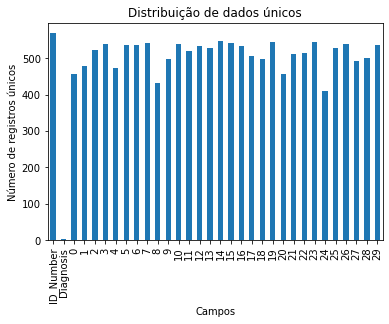

In [5]:
def distribution(df):
  num_unique_labels = df.apply(pd.Series.nunique) #Return number of unique elements in the object (Excludes NA values by default)
  num_unique_labels.plot( kind='bar')

  plt.xlabel('Campos')
  plt.ylabel('Número de registros únicos')
  plt.title('Distribuição de dados únicos')
  plt.show()

distribution(df)

#### **Análise de distribuição dos dados da classe y --> (b = benigno e m = maligno)**

Benigno:  357
Maligno:  212


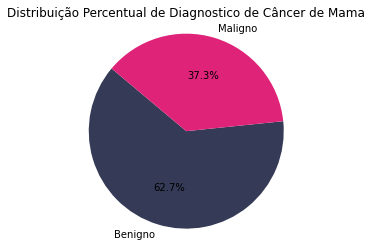

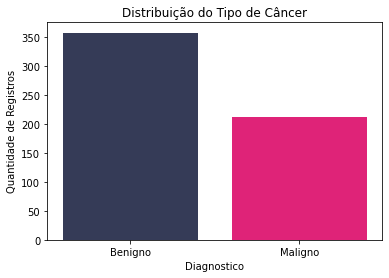

In [3]:
B = pd.value_counts(df['Diagnosis']) [0]
M = pd.value_counts(df['Diagnosis']) [1]

tam = len(df)

print('Benigno: ', B)
print('Maligno: ', M)

pie = pd.DataFrame([['Benigno', B], ['Maligno', M]], columns=['Diagnostico', 'Quantidade'])

def pie_chart(df, col1, col2, title):
  labels = {'Benigno': 0, 'Maligno': 1}
  sizes = df[col2]
  colors = ['#353B57', '#df2378']

  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140, labeldistance=1.1)

  plt.title( title )
  plt.axis('equal')
  plt.savefig('pie_chart',facecolor='w', edgecolor='w', format='png')
  plt.show()

pie_chart(pie, 'Diagnostico', 'Quantidade', 'Distribuição Percentual de Diagnostico de Câncer de Mama')


plt.bar(pie.Diagnostico, pie.Quantidade, color = ['#353B57', '#df2378'])
plt.title('Distribuição do Tipo de Câncer')
plt.xlabel('Diagnostico')
plt.ylabel('Quantidade de Registros')
plt.savefig('bar_graph',facecolor='w', edgecolor='w', format='png')
plt.show()

#### **Split do Dataset**

In [23]:
# X = variaveis independentes
# y = variaveis dependentes

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [11]:
X.head()

,ID_Number,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### **Importando encoder para transformar as labels(M e B) em chaves numéricas**

In [24]:
pd.get_dummies(y)

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [25]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
#y = pd.get_dummies(y)
y = enc.fit_transform(y)

In [27]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [4]:
from sklearn.preprocessing import OneHotEncoder
Oht_enc = OneHotEncoder()
X = pd.DataFrame(Oht_enc.fit_transform(X).A)

In [10]:
X.shape

(569, 15909)

#### **Train test split**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None, stratify = y)

In [10]:
y_test

280    M
502    B
513    B
227    B
99     M
      ..
284    B
74     B
209    B
266    B
234    B
Name: Diagnosis, Length: 171, dtype: object

#### **Feature scalling**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X.train = scaler.transform(X_train)
X.test = scaler.transform(X_test)

<ipython-input-7-d0272aa564b0>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.train = scaler.transform(X_train)
<ipython-input-7-d0272aa564b0>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.test = scaler.transform(X_test)


#### **Criando KNN model**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')


KNeighborsClassifier()

#### **Prevendo os valores de y para os dados de teste**

In [9]:
y_pred = classifier.predict(X_test)

#### **Análise dos resultados**

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
print('Matriz Confusão: ')
print(confusion_matrix(y_test, y_pred), "\n")

print('Relatório de classifição: \n', classification_report(y_test, y_pred))

print('Acurácia do modelo: ', accuracy_score(y_test, y_pred))

Matriz Confusão: 
[[91 16]
 [36 28]] 

Relatório de classifição: 
               precision    recall  f1-score   support

           B       0.72      0.85      0.78       107
           M       0.64      0.44      0.52        64

    accuracy                           0.70       171
   macro avg       0.68      0.64      0.65       171
weighted avg       0.69      0.70      0.68       171

Acurácia do modelo:  0.695906432748538


#### **Aplicando loop para diferentes valores de k**

In [12]:
error = []

for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

#### **Comparando error rate gerado**

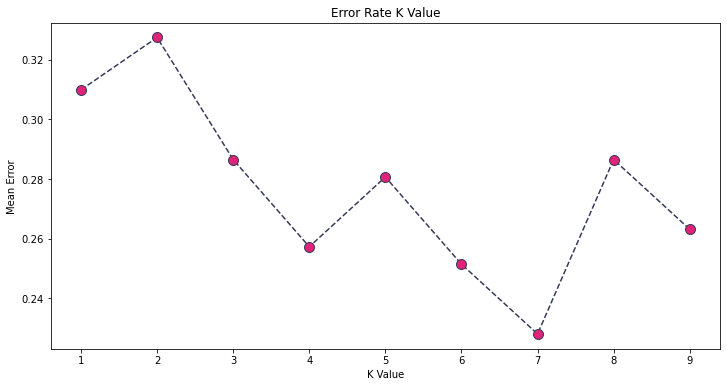

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='#353B57', linestyle='dashed', marker='o', markerfacecolor='#df2378', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')
plt.savefig('Error Rate K value',facecolor='w', edgecolor='w', format='png')

#### **Aplicando melhor parâmetro K calculado**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(n_neighbors=1)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  

print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Matriz Confusa: 
[[81 26]
 [22 42]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           B       0.79      0.76      0.77       107
           M       0.62      0.66      0.64        64

    accuracy                           0.72       171
   macro avg       0.70      0.71      0.70       171
weighted avg       0.72      0.72      0.72       171

Acurácia do modelo:  0.7192982456140351


####

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
scores_list = []
for k in range(1,11):
    scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train,y_train)
        accuracy = model.score(X_test,y_test)
        scores.append(accuracy)
    #scores_list.append(np.mean(scores))
    scores_list.append(scores)

In [19]:
print(scores_list)

[[0.6223776223776224, 0.6363636363636364, 0.6643356643356644, 0.6083916083916084, 0.6853146853146853, 0.6993006993006993, 0.6013986013986014, 0.6503496503496503, 0.6573426573426573, 0.6433566433566433], [0.6503496503496503, 0.7062937062937062, 0.6293706293706294, 0.7272727272727273, 0.7202797202797203, 0.6643356643356644, 0.6713286713286714, 0.7132867132867133, 0.6923076923076923, 0.6573426573426573], [0.6853146853146853, 0.6503496503496503, 0.7272727272727273, 0.7552447552447552, 0.6783216783216783, 0.6573426573426573, 0.6713286713286714, 0.6853146853146853, 0.6923076923076923, 0.7272727272727273], [0.7202797202797203, 0.6433566433566433, 0.7062937062937062, 0.6783216783216783, 0.6433566433566433, 0.6853146853146853, 0.6433566433566433, 0.6713286713286714, 0.6993006993006993, 0.7132867132867133], [0.7552447552447552, 0.7272727272727273, 0.6853146853146853, 0.6993006993006993, 0.7132867132867133, 0.7062937062937062, 0.6923076923076923, 0.6923076923076923, 0.6293706293706294, 0.69230769

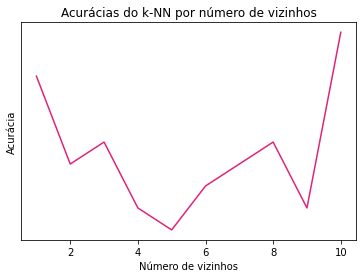

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(np.arange(1,11), scores, color= '#df2378')
plt.yticks([])
plt.title('Acurácias do k-NN por número de vizinhos')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.savefig('Acurácias do k-NN por número de vizinhos', facecolor='w', edgecolor='w', format='png')

#### **Criando o csv com a lista de scores**

In [21]:
k = list(np.arange(1,11))
df = pd.DataFrame(scores, columns=['accuracy'])
df.index = k
csv_data = df.to_csv('file_scores_kNN.csv', index=True, index_label='tests')

                        =========================== Cross-Validation ===========================

In [22]:
neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  11 


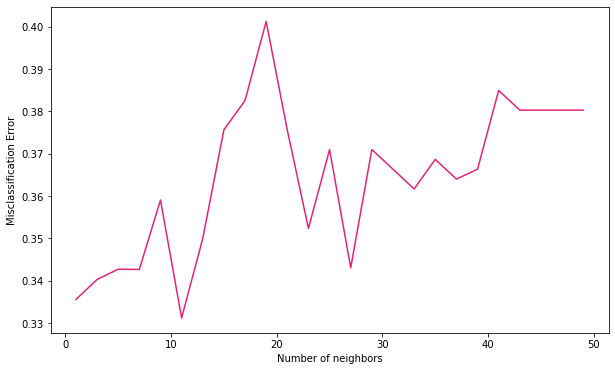

In [23]:
MSE = [1-x for x in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE, color= '#df2378')
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

                        =========================== MLP ===========================

In [14]:
key_random = random.SystemRandom()
seed = key_random.randint(0, 9999)

In [15]:
layer_sizes = [10, 20, 30, 40, 50, 60, 70]

In [16]:
scores_list = []
for sizes in layer_sizes:
    scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=seed)
        model = MLPClassifier(hidden_layer_sizes=(sizes,), max_iter=1000, verbose=1)
        model.fit(X_train,y_train)
        accuracy = model.score(X_test,y_test)
        scores.append(accuracy)
    #scores_list.append(np.mean(scores))
    scores_list.append(scores)

Iteration 1, loss = 0.69090384
Iteration 2, loss = 0.65035657
Iteration 3, loss = 0.61935402
Iteration 4, loss = 0.59181621
Iteration 5, loss = 0.56589092
Iteration 6, loss = 0.54035780
Iteration 7, loss = 0.51503765
Iteration 8, loss = 0.49004972
Iteration 9, loss = 0.46541561
Iteration 10, loss = 0.44152386
Iteration 11, loss = 0.41780703
Iteration 12, loss = 0.39534476
Iteration 13, loss = 0.37368435
Iteration 14, loss = 0.35285558
Iteration 15, loss = 0.33311627
Iteration 16, loss = 0.31460991
Iteration 17, loss = 0.29717343
Iteration 18, loss = 0.28063974
Iteration 19, loss = 0.26507603
Iteration 20, loss = 0.25047793
Iteration 21, loss = 0.23685858
Iteration 22, loss = 0.22374227
Iteration 23, loss = 0.21142038
Iteration 24, loss = 0.19974784
Iteration 25, loss = 0.18879627
Iteration 26, loss = 0.17843890
Iteration 27, loss = 0.16849203
Iteration 28, loss = 0.15912589
Iteration 29, loss = 0.14997034
Iteration 30, loss = 0.14135577
Iteration 31, loss = 0.13318706
Iteration 32, los

In [17]:
medians = []

for score in scores_list:
  medians.append(np.median(score))

print(medians)

[0.6812865497076024, 0.7046783625730995, 0.7017543859649122, 0.6988304093567251, 0.7076023391812866, 0.6929824561403508, 0.7017543859649122]


In [18]:
for i in range(len(medians)):
  if medians[i] == max(medians):
    max_index = i

In [19]:
layer_sizes[max_index]

50

In [20]:
scores_list[max_index]

[0.7076023391812866,
 0.6842105263157895,
 0.7192982456140351,
 0.695906432748538,
 0.7192982456140351,
 0.695906432748538,
 0.7076023391812866,
 0.7309941520467836,
 0.6783625730994152,
 0.7426900584795322]

In [21]:
df = pd.DataFrame(scores_list, index=layer_sizes).T

df.to_excel('score_all.xlsx')

In [3]:
df.describe('score_all.xlsx')

NameError: name 'df' is not defined

In [22]:
df = pd.DataFrame(scores_list[max_index])

df.to_excel('scores_max.xlsx')

### **Melhores resultados de KNN e MLP**

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
scores_knn = cross_val_score(knn, X, y, cv = 10)

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
scores_mlp = cross_val_score(mlp, X, y, cv = 10)

In [34]:
df_knn = pd.DataFrame(scores_knn)
df_knn.to_excel('planilha_knn.xlsx')

df_mlp = pd.DataFrame(scores_mlp)
df_mlp.to_excel('planilha_mlp.xlsx')

#### **Excel to CSV**

In [37]:
#importing pandas as pd
import pandas as pd

# Read and store content
# of an excel file 
df = pd.read_excel (r'/home/graziele/Downloads/Aulas/Disciplinas_2021_1/Inteligência Computacional/Avaliações/P2/best_MLP_KNN.xlsx')
  
# Write the dataframe object
# into csv file

df.to_csv('results.csv', index=False)

# show the dataframe
df

,Arq,Scores
0,knn_5,0.438596
1,knn_5,0.210526
2,knn_5,0.140351
3,knn_5,0.087719
4,knn_5,0.122807
5,knn_5,0.228070
6,knn_5,0.228070
7,knn_5,0.175439
8,knn_5,0.368421
9,knn_5,0.625000
